![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [1]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

c:\Users\zoona\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [ ]:
# eda on penguins_df
penguins_df.info()
penguins_df.describe()
penguins_df.isnull().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex_MALE           332 non-null    uint8  
dtypes: float64(4), uint8(1)
memory usage: 10.8 KB


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_MALE
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,36.7,19.3,193.0,3450.0,0
4,39.3,20.6,190.0,3650.0,1


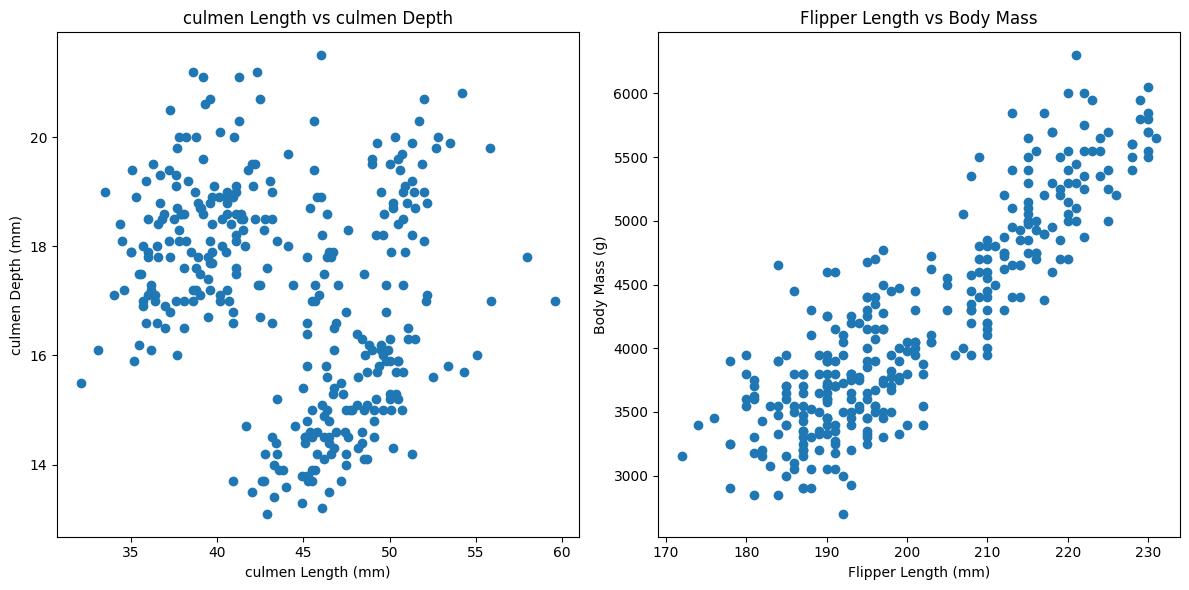

In [4]:
# visualizing the dataset
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(penguins_df["culmen_length_mm"], penguins_df["culmen_depth_mm"])
plt.title("culmen Length vs culmen Depth")
plt.xlabel("culmen Length (mm)")
plt.ylabel("culmen Depth (mm)")

plt.subplot(1, 2, 2)
plt.scatter(penguins_df["flipper_length_mm"], penguins_df["body_mass_g"])
plt.title("Flipper Length vs Body Mass")
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")

plt.tight_layout()
plt.show()



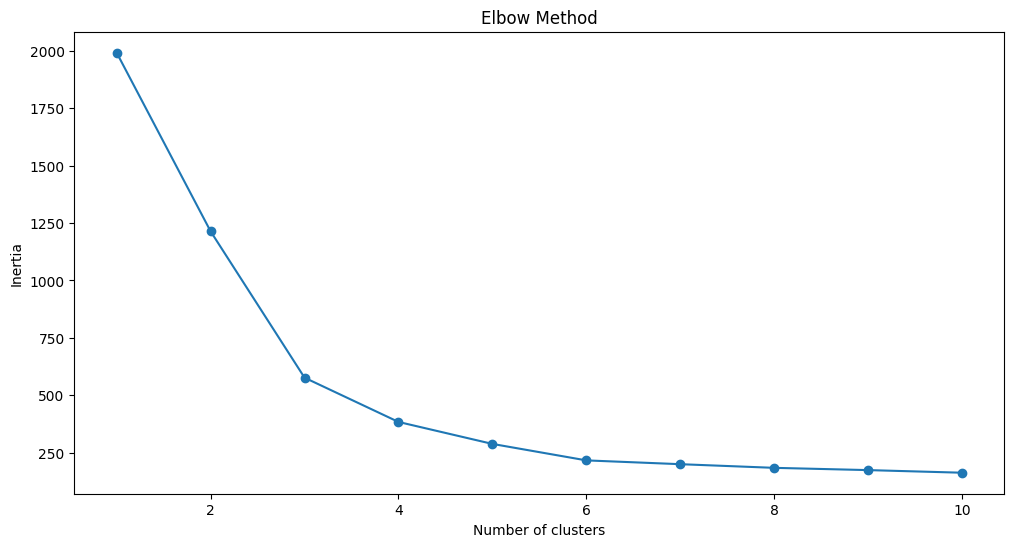

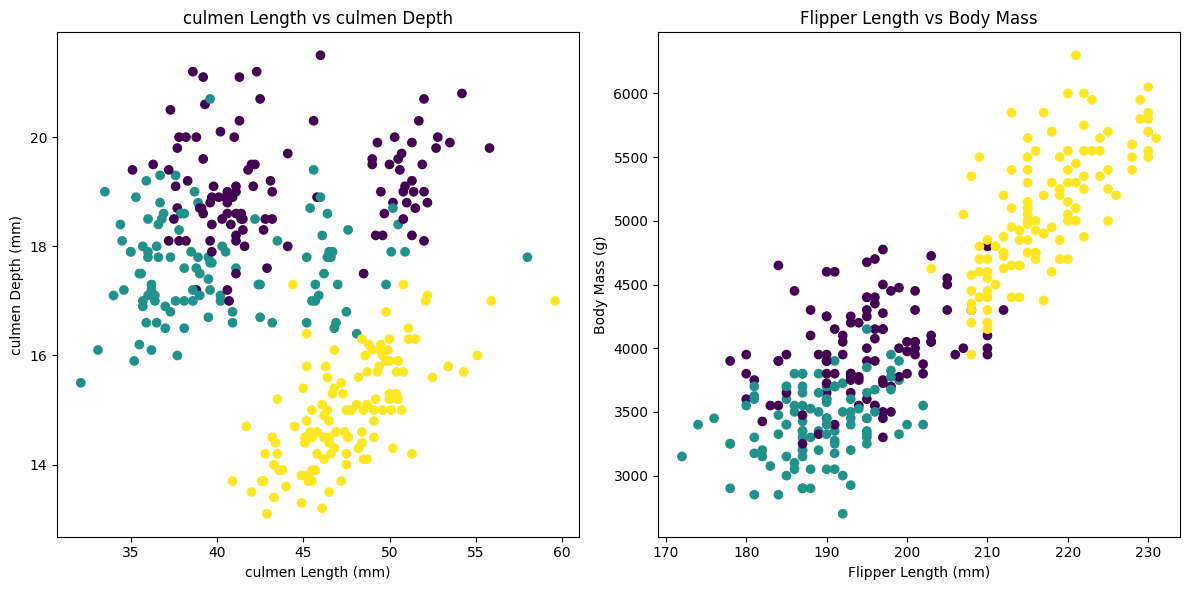

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_MALE
cluster,,,,,
0,43.878302,19.111321,194.764151,4006.603774,1.000000
1,40.217757,17.611215,189.046729,3419.158879,0.000000
2,47.568067,14.996639,217.235294,5092.436975,0.512605


In [ ]:
# k-means clustering

# 1. preprocessing to create dummy variables
penguins_df = pd.get_dummies(penguins_df, drop_first=True)
# penguins_df.head()

# 2. standardizing the data
scaler = StandardScaler()
penguins_scaled = scaler.fit_transform(penguins_df)
penguins_scaled = pd.DataFrame(penguins_scaled, columns=penguins_df.columns)
#penguins_scaled.head()

# 3. fitting the model
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans.fit(penguins_scaled)

# 4. visualise to detect optimal number of clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans.fit(penguins_scaled)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# 5. re-fit with k=3
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans.fit(penguins_scaled)

# visualise the clusters
penguins_df["cluster"] = kmeans.labels_
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(penguins_df["culmen_length_mm"], penguins_df["culmen_depth_mm"], c=penguins_df["cluster"], cmap='viridis')
plt.title("culmen Length vs culmen Depth")
plt.xlabel("culmen Length (mm)")
plt.ylabel("culmen Depth (mm)")

plt.subplot(1, 2, 2)
plt.scatter(penguins_df["flipper_length_mm"], penguins_df["body_mass_g"], c=penguins_df["cluster"], cmap='viridis')
plt.title("Flipper Length vs Body Mass")
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")

plt.tight_layout()
plt.show()



# 6. create statistical summary of the clusters
# list numeric columns from penguins_df, drop 'sex'
numeric_cols = penguins_df.select_dtypes(include=['float64', 'int64']).columns
# add cluster column to df
penguins_df['cluster'] = kmeans.labels_
# group by cluster and calculate mean
stats_penguins = penguins_df.groupby('cluster')[numeric_cols].mean()

# print the statistics
print(stats_penguins)


